In [113]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [114]:
# Load the data
df =pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [116]:
# check missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [117]:
# Lets make X and Y in our data
X = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [118]:
# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
# Train Test Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# Call the model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# Train the model
model.fit(X_train, y_train)
# Predict the model
y_pred = model.predict(X_test)

In [121]:
# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.28445004257669637
Mean Squared Error: 0.20072154545709803
Root Mean Squared Error: 0.44801958155542493
R2 Score: 0.11770749249627255


Text(0, 0.5, 'Purchased')

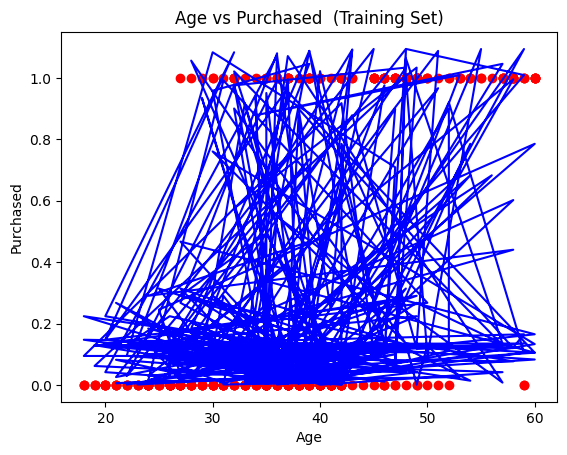

In [125]:
# Visualize the training set results
plt.scatter(X_train[:,0], y_train, color='red')
plt.plot(X_train[:,0], model.predict(X_train), color='blue')
plt.title('Age vs Purchased  (Training Set)')
plt.xlabel('Age')
plt.ylabel('Purchased')

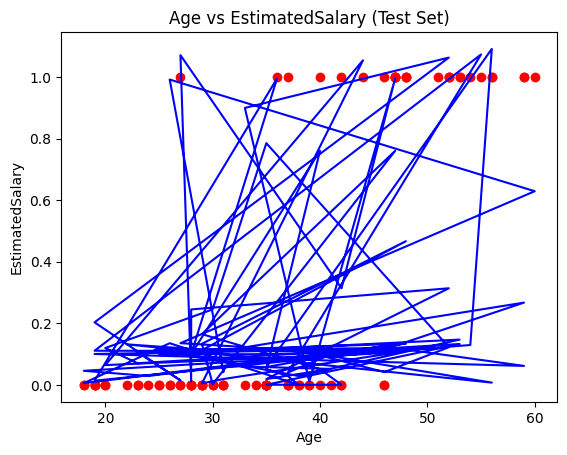

In [123]:
# Create a new figure for the test set results
plt.figure()
# Visualize the test set results
plt.scatter(X_test[:,0], y_test, color='red')
plt.plot(X_test[:,0], model.predict(X_test), color='blue')
plt.title('Age vs Purchased  (Test Set)')
plt.xlabel('Age')
plt.ylabel('Purchased ')

plt.show()

In [127]:
model.predict([[40,0]])

array([-0.04094874])